In [247]:
import re
import time
import io
import os
import json
import pandas as pd
from optparse import OptionParser
from pandas import DataFrame, read_csv
import jieba
path='./data/'

In [248]:
file=pd.read_csv('C:/Users/user/Desktop/0117.csv')
file

,類別,非公益組織團體,內文
0,健康醫療,社團法人宜蘭縣愛胰協會,台灣糖尿病患者年年增加，根據衛福部統計，18歲以上糖尿病盛行率為11.8%，約有227萬名糖...
1,老人福利,社團法人宜蘭縣愛胰協會,今年72歲的王奶奶，罹患二型糖尿病15年，糖化血色素一直都維持在標準值內，為醫師眼中的控糖模...
2,健康醫療,社團法人桃園縣職能治療師公會,對於身心障礙者及家屬而言，身體要復健，心理的復健更是重要，面對長期照顧這個議題，往往是一種有...
3,老人福利,社團法人桃園縣職能治療師公會,金門縣衛生局今天舉辦預防及延緩失能服務成果發表，經過12週的課程，來自金門各社區長輩已經能主...
4,健康醫療,中華安全行動照護協會,在照護研習的現場，授課講師正積極的指導護理師與照服員，如何以最省力方式，完成病患移位的工作。...
5,老人福利,中華安全行動照護協會,台灣社會的高齡化速度加快，今年台灣老年人口比率已達總人口數的14％，正式進入「高齡社會」，未...
6,健康醫療,臺灣園藝輔助治療協會,生病就會想到吃藥，而藥物中有許多成分都自植物萃取，其實，透過「種」植物的過程也能治病。亞東醫...
7,老人福利,臺灣園藝輔助治療協會,台南就業中心24日舉辦「銀」向綠世界就業促進研習活動，年逾60歲黃盛璘老師，向在場60多位銀...
8,健康醫療,國際醫療衛生促進協會,國際醫療衛生促進協會22日在台大校友會館舉行國際醫療研討會，並由理事長邱文達親自主持，今年邀...
9,老人福利,國際醫療衛生促進協會,交通部觀光局擬跨部會合作，擴大推動特色醫療，提升來台就醫人數，醫界反應兩極。有一派認為台灣醫...


In [249]:
import csv
with open('C:/Users/user/Desktop/0117.csv','r', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    column1 = [row[2]for row in reader]
    print(column1)


['內文', '台灣糖尿病患者年年增加，根據衛福部統計，18歲以上糖尿病盛行率為11.8%，約有227萬名糖尿病患者。衛福部最新公布的10大死因，糖尿病位居第5位，平均55分鐘左右就有1人因糖尿病死亡。糖尿病常見的併發症如視網膜病變、動脈硬化、血管病變等，目前糖尿病治療以控制血糖為主，但在減輕治療不便、增加患者遵從醫囑的順從度，有了大幅度的進步。\n第一型糖尿病\n1 人工胰臟\n第一型糖尿病需接受胰島素注射，為了方便患者，現在已有胰島素幫浦，腹部放置軟針儀器偵測血糖後，能自動注射胰島素，該技術並促成「人工胰臟」發展。\n人工胰臟是將感應器及胰島素植入體內，透過體液提供的數據，直接運作。目前感應器植入體內運算的技術已相當成熟，但放入體內的胰島素以及感應器放置位置卻仍在研究中，若是能夠突破道德及部分技術，近年內將有相當的進展。\n\n2 減少扎指頭的血糖機\n\n目前國內所有的血糖機都需要採集患者指尖血液才能監測血糖。美國食品藥物管理局已核准連續血糖監測儀「Dexcom G5」，測得數據可直接用於胰島素調整，每天僅需要採集2次指尖血液作為校正，其餘數據可以透過儀器24小時監控，更可以傳送到手機裡累積血糖數據，精準度已經獲得認可，踏出減少扎指頭的一大步。\n\n另外，也有業者研發出超音波或紅外線監測法，可進一步免去採集指尖血液的痛楚，透過監測人體細胞密度的不同，瞭解體內的血糖變化。目前已經有相關產品，但精準度有待提升，目前國內並未販售，但免去採集指尖血液而能獲知血糖數值，將是醫界努力目標。\n\n3 吸入型胰島素\n\n施打胰島素讓許多患者懼怕，業界不斷替代方法，現階段已經研發出劑量低可在餐前使用的「吸入型胰島素」，台灣尚未獲得食藥署許可，國外已經販售，該產品可增加患者使用胰島素意願。\n\n4 基因檢測\n\n第一型糖尿病發病前，免疫系統會逐漸出現異狀，未來希望可以透過監測基因、免疫系統改變、體內抗體等指標，提供預防第一型糖尿病的積極作為。\n\n第二型糖尿病\n1 減少藥物種類：使用藥物愈來愈少，控制血糖的藥品朝向多種成分結合在單顆藥品方式呈現，抑制升糖素分泌的腸泌素 GLP-1，現在需要24小時內施打，未來將發展長效型腸泌素，打1針可維持1周或1個月；現在也研發出胰島素合併腸泌素的藥劑，最快年底可望用於臨床。\n\n2 阻斷肥胖：肥胖是造成第二型糖尿病的危險因子，

In [250]:
corpus = []
str1 = ''.join(column1)
corpus.append(str1)

In [251]:
corpus_cut = [jieba.lcut(t) for t in corpus]
# 這樣就有斷完詞後的 list 了
corpus_cut

[['內',
  '文台',
  '灣',
  '糖尿病',
  '患者',
  '年',
  '年',
  '增加',
  '，',
  '根據',
  '衛福部',
  '統計',
  '，',
  '18',
  '歲',
  '以上',
  '糖尿病',
  '盛行',
  '率為',
  '11.8%',
  '，',
  '約',
  '有',
  '227',
  '萬名',
  '糖尿病',
  '患者',
  '。',
  '衛福部',
  '最新',
  '公布',
  '的',
  '10',
  '大',
  '死因',
  '，',
  '糖尿病',
  '位居',
  '第',
  '5',
  '位',
  '，',
  '平均',
  '55',
  '分鐘',
  '左右',
  '就',
  '有',
  '1',
  '人因',
  '糖尿病',
  '死亡',
  '。',
  '糖尿病',
  '常見',
  '的',
  '併',
  '發症',
  '如視',
  '網膜',
  '病變',
  '、',
  '動脈',
  '硬化',
  '、',
  '血管病',
  '變等',
  '，',
  '目前',
  '糖尿病',
  '治療',
  '以',
  '控制',
  '血糖',
  '為主',
  '，',
  '但',
  '在',
  '減輕',
  '治療',
  '不便',
  '、',
  '增加',
  '患者',
  '遵從',
  '醫囑',
  '的',
  '順',
  '從度',
  '，',
  '有',
  '了',
  '大幅度',
  '的',
  '進步',
  '。',
  '\n',
  '第一',
  '型',
  '糖尿病',
  '\n',
  '1',
  ' ',
  '人工',
  '胰臟',
  '\n',
  '第一',
  '型',
  '糖尿病',
  '需',
  '接受',
  '胰島素',
  '注射',
  '，',
  '為',
  '了',
  '方便',
  '患者',
  '，',
  '現在',
  '已有',
  '胰島素',
  '幫浦',
  '，',
  '腹部',
  '放置',
  '軟針',
  '儀器',
  '偵測'

In [252]:
mergeData = file.groupby(['類別', '非公益組織團體'])['內文'].apply(' '.join).reset_index()
mergeData.head()

,類別,非公益組織團體,內文
0,健康醫療,中華安全行動照護協會,在照護研習的現場，授課講師正積極的指導護理師與照服員，如何以最省力方式，完成病患移位的工作。...
1,健康醫療,中華民國醫務社會工作協會,病人與家屬在就醫過程中可能因為家庭、經濟以及就業等許多問題而產生困擾、無助的情況，這時如何由...
2,健康醫療,台灣安寧照顧協會,「掌握人生的王牌，你有幾張」！這不是心靈導師的勵語，而是「預立安寧緩和醫療暨維生抉擇意願書」...
3,健康醫療,台灣素食營養學會,成立近10年的台灣素食營養學會，最近與大林慈濟醫院營養治療科及嘉義市營養師公會舉辦「飲食與疾...
4,健康醫療,國際醫療衛生促進協會,國際醫療衛生促進協會22日在台大校友會館舉行國際醫療研討會，並由理事長邱文達親自主持，今年邀...


In [253]:
mergeData['類別'][mergeData['類別'] == "健康醫療"] = 'health'
mergeData['類別'][mergeData['類別'] == "老人福利"] = 'old'
mergeData.head()

,類別,非公益組織團體,內文
0,health,中華安全行動照護協會,在照護研習的現場，授課講師正積極的指導護理師與照服員，如何以最省力方式，完成病患移位的工作。...
1,health,中華民國醫務社會工作協會,病人與家屬在就醫過程中可能因為家庭、經濟以及就業等許多問題而產生困擾、無助的情況，這時如何由...
2,health,台灣安寧照顧協會,「掌握人生的王牌，你有幾張」！這不是心靈導師的勵語，而是「預立安寧緩和醫療暨維生抉擇意願書」...
3,health,台灣素食營養學會,成立近10年的台灣素食營養學會，最近與大林慈濟醫院營養治療科及嘉義市營養師公會舉辦「飲食與疾...
4,health,國際醫療衛生促進協會,國際醫療衛生促進協會22日在台大校友會館舉行國際醫療研討會，並由理事長邱文達親自主持，今年邀...


In [254]:
corpus = mergeData['內文'].values.tolist()

In [255]:
# TF-IDF
# coding:utf-8  
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  

from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

In [256]:
len(corpus)
features = tfidf.toarray()
labels = mergeData['非公益組織團體'].values
labels

array(['中華安全行動照護協會', '中華民國醫務社會工作協會', '台灣安寧照顧協會', '台灣素食營養學會', '國際醫療衛生促進協會',
       '天主教耕莘醫院', '晉生醫療社團法人晉生慢性醫院', '清福養老院', '社團法人台灣失智症協會', '社團法人宜蘭縣愛胰協會',
       '社團法人桃園縣職能治療師公會', '臺灣園藝輔助治療協會', '衛生福利部桃園醫院', '財團法人乳癌防治基金會',
       '財團法人信望愛臍帶血基金會', '財團法人千禧之愛健康基金會', '財團法人厚生基金會', '財團法人台灣癌症基金會',
       '財團法人器官捐贈移植登錄中心', '財團法人腎臟病防治基金會', '財團法人藥害救濟基金會', '中華安全行動照護協會',
       '中華民國退休基金協會', '中華民國醫務社會工作協會', '台灣高齡化政策暨產業發展協會', '國際醫療衛生促進協會',
       '埔基醫療財團法人', '天主教耕莘醫院', '晉生醫療社團法人晉生慢性醫院', '清福養老院',
       '社團法人中華民國士林靈糧堂社會福利協會', '社團法人台灣健康人權行動協會', '社團法人台灣老人福利機構協會',
       '社團法人宜蘭縣愛胰協會', '社團法人桃園市失智症關懷協會', '社團法人桃園縣職能治療師公會',
       '社團法人臺南市灣港照顧關懷協會', '臺灣園藝輔助治療協會', '財團法人千禧之愛健康基金會',
       '財團法人台南市私立上崙社會福利慈善事業基金會', '財團法人新北市私立台灣天主教安老院',
       '財團法人臺北市無子西瓜社會福利基金會', '財團法人藥害救濟基金會'], dtype=object)

In [257]:
# PCA
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transData = pca.fit_transform(features, labels)
type(transData)
mergeData['pca1'] = DataFrame(transData[:,0])
mergeData['pca2'] = DataFrame(transData[:,1])
mergeData.head()

,類別,非公益組織團體,內文,pca1,pca2
0,health,中華安全行動照護協會,在照護研習的現場，授課講師正積極的指導護理師與照服員，如何以最省力方式，完成病患移位的工作。...,0.017170,0.076012
1,health,中華民國醫務社會工作協會,病人與家屬在就醫過程中可能因為家庭、經濟以及就業等許多問題而產生困擾、無助的情況，這時如何由...,-0.027654,0.040198
2,health,台灣安寧照顧協會,「掌握人生的王牌，你有幾張」！這不是心靈導師的勵語，而是「預立安寧緩和醫療暨維生抉擇意願書」...,0.032362,-0.047729
3,health,台灣素食營養學會,成立近10年的台灣素食營養學會，最近與大林慈濟醫院營養治療科及嘉義市營養師公會舉辦「飲食與疾...,-0.072501,-0.077644
4,health,國際醫療衛生促進協會,國際醫療衛生促進協會22日在台大校友會館舉行國際醫療研討會，並由理事長邱文達親自主持，今年邀...,-0.101469,-0.001614


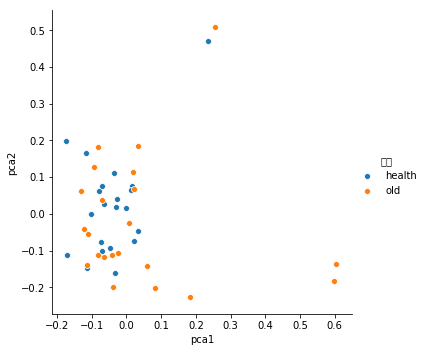

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(x_vars=['pca1'], y_vars=['pca2'], data=mergeData, hue="類別", height=5)

In [259]:
textFrame = pd.DataFrame(features, columns = word)
textFrame.head()
len(features)

43

In [260]:
allF = features.flatten()
nonZero = allF[np.nonzero(allF)]
m = np.median(nonZero)

In [261]:
allF[np.nonzero(allF)]

array([0.27203178, 0.13601589, 0.13601589, ..., 0.13746937, 0.13746937,
       0.13746937])

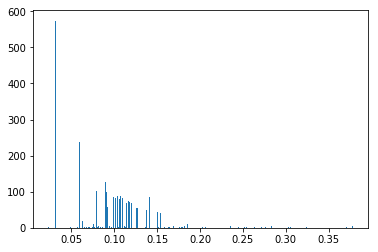

0.09255834746205403

In [262]:
plt.hist(nonZero, bins=500)
plt.show()
m

In [263]:
m = 0.1
dataset = list()
for i in range(len(features)):
    temp = textFrame.columns.values[[textFrame.iloc[i] >= m]]
    dataset.append(temp.tolist())

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


In [264]:
for i in range(len(features)):
    print(dataset[i])

['lift', 'no', 'policy', '中華安全行動照護協會秘書長張瀞仁', '台北市私立晉安老人長期照護中心主任朱淑惠', '壽豐護理之家護理長江筱蕙', '還有就是長輩的安全性也提高了']
['17日在大林慈濟醫院國家級考場舉行', 'osce測驗', 'sw', '並了解家庭支持系統', '並依照法律規定通報', '也算是對自己的總評量', '也讓她學到從理論基礎以外的實務經驗', '了解如何和病人會談', '事發過程有無目睹兒少或家庭中有無兒少受暴等', '以操作型定義評分達到考核一致性', '企圖自殺', '企圖自殺問題', '但是經由不斷的測試', '受傷', '口頭', '各縣市家庭暴力及性侵害防治中心', '嘉義基督教醫院', '報告', '大林慈濟醫院', '如何開口詢問病人', '學校內的筆試', '家屬最好的服務品質', '實習', '實習前兩天曾在林口長庚做過前測', '實習後再到大林慈濟醫院參加後測', '實習時間雖然感覺是那麼的短暫', '希望參與的大三暑期社工實習生能在這次測試中', '感覺受益良多', '應試考生中山醫學大學三年級吳同學表示', '或各縣市自殺防治中心', '所學的知識', '承辦的資深社工師余靜容表示', '文化敏感度及評估與介入策略的能力', '是否能因應未來社工職場', '是否都能真實幫助病人', '更能提升自己的臨床處理技能', '會談的重點需確認病人疾病狀況及病人社會福利身分', '會談重點在於了解自殺原因', '未來給予病人', '此次由中華民國醫務社會工作協會主辦', '每位考生須通過三個個案工作考題', '每次會談需先確認身分', '測試中面對標準病人', '無助的情況', '物質', '由醫院資深社會工作師藉臨床技能測驗', '疑似家庭暴力被害者', '病人與家屬在就醫過程中可能因為家庭', '皆會有標準化病人擔任案主或家屬', '精神科病史', '紙本', '經濟以及就業等許多問題而產生困擾', '經濟及福利諮詢問題', '經濟暨福利諮詢', '經過', '考核考生會談技巧', '考生運用專業會談完成評估及提供協助', '考生需給予情緒支持', '考生須了解個案的疾病史及就醫', '而針對', '而首次雲嘉南區社會工作客觀結構式臨床技能測驗', '聖馬爾定醫院', '臨場的反應', '臨

In [265]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
graph = df.T
graph.columns = mergeData['非公益組織團體']

In [266]:
graph.head()

非公益組織團體,中華安全行動照護協會,中華民國醫務社會工作協會,台灣安寧照顧協會,台灣素食營養學會,國際醫療衛生促進協會,天主教耕莘醫院,晉生醫療社團法人晉生慢性醫院,清福養老院,社團法人台灣失智症協會,社團法人宜蘭縣愛胰協會,...,社團法人宜蘭縣愛胰協會,社團法人桃園市失智症關懷協會,社團法人桃園縣職能治療師公會,社團法人臺南市灣港照顧關懷協會,臺灣園藝輔助治療協會,財團法人千禧之愛健康基金會,財團法人台南市私立上崙社會福利慈善事業基金會,財團法人新北市私立台灣天主教安老院,財團法人臺北市無子西瓜社會福利基金會,財團法人藥害救濟基金會
05,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0800,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0也未納入信託機制,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0計畫中,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [267]:
from mlxtend.frequent_patterns import apriori

minsup = 0.01
apriori(graph, min_support = minsup, use_colnames=True)

,support,itemsets
0,0.042958,(中華民國醫務社會工作協會)
1,0.038064,(台灣安寧照顧協會)
2,0.022838,(台灣素食營養學會)
3,0.038608,(天主教耕莘醫院)
4,0.027189,(清福養老院)
5,0.020663,(社團法人桃園縣職能治療師公會)
6,0.019032,(臺灣園藝輔助治療協會)
7,0.030451,(衛生福利部桃園醫院)
8,0.023926,(財團法人乳癌防治基金會)
9,0.030451,(財團法人千禧之愛健康基金會)


In [268]:
result = apriori(graph, min_support = minsup)
result

,support,itemsets
0,0.042958,(1)
1,0.038064,(2)
2,0.022838,(3)
3,0.038608,(5)
4,0.027189,(7)
5,0.020663,(10)
6,0.019032,(11)
7,0.030451,(12)
8,0.023926,(13)
9,0.030451,(15)


In [269]:
rules = association_rules(result, metric="confidence", min_threshold=0.7)
rules.head()

NameError: name 'association_rules' is not defined